In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

Make a bar graph of the prior distribution, P(H), for $\sigma_1 = \sigma_2 = 6$.  Make a graph of the prior distribution for $\sigma_1 = \sigma_2 = 12$.

Tenenbaum expected size prior: $p(h)$ \~ $e^{-(\frac{s_1}{\sigma_1} + \frac{s_2}{\sigma_2})}$

In [2]:
def calc_priors(sigma):
    probs = []
    for i in range(1, 11):
        probs.append(np.exp(-4 * i / sigma))
    norm = sum(probs)
    probs = [j / norm for j in probs]
    return probs

In [3]:
def plot_probs(xvals, probs, title, xlabel="Hypothesis", ylabel="Probability"):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    plt.bar(xvals, probs)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

[0.48720291186115366,
 0.2501383153920434,
 0.12842529324824878,
 0.065935744070431693,
 0.033852539761911341,
 0.017380473436496791,
 0.0089234325991886746,
 0.0045814430569569662,
 0.0023521912953147167,
 0.0012076552782540222]

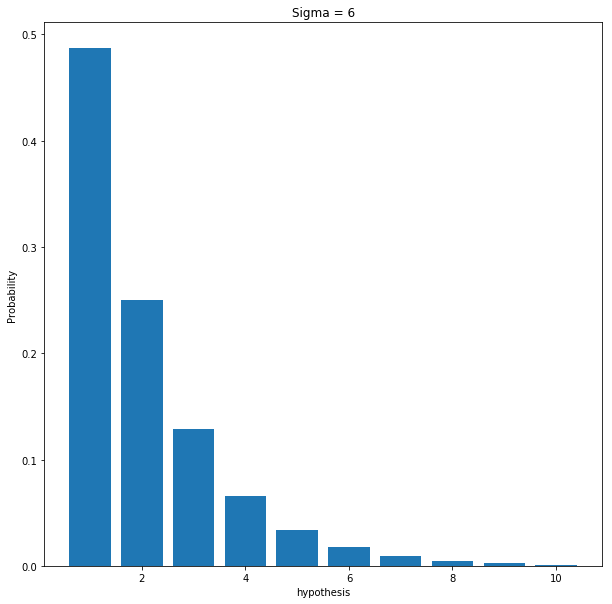

In [41]:
probs = calc_priors(6)
xvals=[i for i in range(1, 11)]
plot_probs(xvals=xvals, probs=probs, title="Sigma = 6", xlabel="hypothesis", ylabel="Probability")
probs

In [42]:
scientific_probs = ['%.5e' % prob for prob in probs]
scientific_probs

['4.87203e-01',
 '2.50138e-01',
 '1.28425e-01',
 '6.59357e-02',
 '3.38525e-02',
 '1.73805e-02',
 '8.92343e-03',
 '4.58144e-03',
 '2.35219e-03',
 '1.20766e-03']

In [43]:
sum(probs)

1.0000000000000002

[0.29395524695030584,
 0.21062813834734448,
 0.15092165601374014,
 0.10814009197749183,
 0.077485761830202324,
 0.055520974475003378,
 0.039782516604908065,
 0.028505418760838314,
 0.020425025063158155,
 0.014635169977007203]

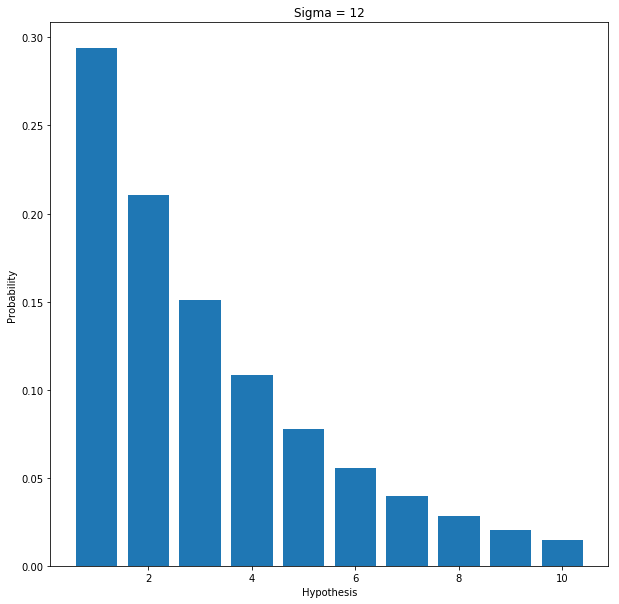

In [44]:
probs = calc_priors(12)
plot_probs(xvals, probs, "Sigma = 12")
probs

In [45]:
scientific_probs = ['%.5e' % prob for prob in final_probs]
scientific_probs

['0.00000e+00',
 '0.00000e+00',
 '4.54366e-01',
 '2.23678e-01',
 '1.25284e-01',
 '7.61427e-02',
 '4.89586e-02',
 '3.28049e-02',
 '2.26844e-02',
 '1.60808e-02']

## Task 2

Given one observation, $X = \{(1.5, 0.5)\}$, compute the posterior $P(H \vert X)$ with $\sigma = 12$. You will get one probability for each possible hypothesis. Display your result either as a bar graph or a list of probabilities. Use Tenenbaum's Size Principle as the likelihood function.

For all integer values $H \in [2, 10] P(\{X=(1.5, 0.5)\} \vert H)$ = 1 

Therefore each successive probability becomes $\frac{P(H)}{P(H_1) + P(H_2) + ...+ P(H_{10})}$

In [46]:
def calc_priors(sigma):
    probs = []
    for i in range(1, 11):
        probs.append(np.exp(-4 * i / sigma))
    norm = sum(probs)
    probs = [j / norm for j in probs]
    return probs

In [47]:
def calc_final_probs(priors, points):
    max_point = 0
    for point in points:
        point = tuple([abs(a) for a in point])
        if max(point) > max_point:
            max_point = max(point)
    # Working with discrete values between 1 and 10
    max_point = int(np.floor(max_point))
    priors = priors[max_point:]
    tmp_probs = [0 for i in range(max_point)]
    priors = tmp_probs + priors  # Now have an appropriate length vector
    posts = [prior * 1/(((2*(i+1))**2))**len(points) for i, prior in enumerate(priors)]
    # Normalization:
    norm = sum(posts)
    final_posts = [post/norm for post in posts]
    return final_posts

In [48]:
def contour_plot(probs):
    prob_array = np.zeros([21, 21])
    for u in range(-10, 11):
        for v in range(-10, 11):
            idx = max(abs(u), abs(v))
            if idx == 0:
                prob_array[0 + 10][0 + 10] = 0
            else:
                prob_array[u + 10][v + 10] = probs[idx - 1]
    return prob_array


In [49]:
priors = calc_priors(12)
final_probs = calc_final_probs(priors, [(1.5, .5)])

In [50]:
final_probs

[0.0,
 0.63840373714832888,
 0.20330500731293197,
 0.081941851876583788,
 0.037576897610222003,
 0.018697933119409354,
 0.0098431747516443246,
 0.0053999094116425712,
 0.0030571489720130295,
 0.0017743397972240045]

In [51]:
# priors = calc_priors(12)
# # priors = priors[1:]  # posterior for h=1 is 0
# norm = sum(priors)
# probs = []
# for i, prior in enumerate(priors_:
#     probs.append(prior/norm)*(1/(2*i**2))
# xvals = [i for i in range(1, 11)]

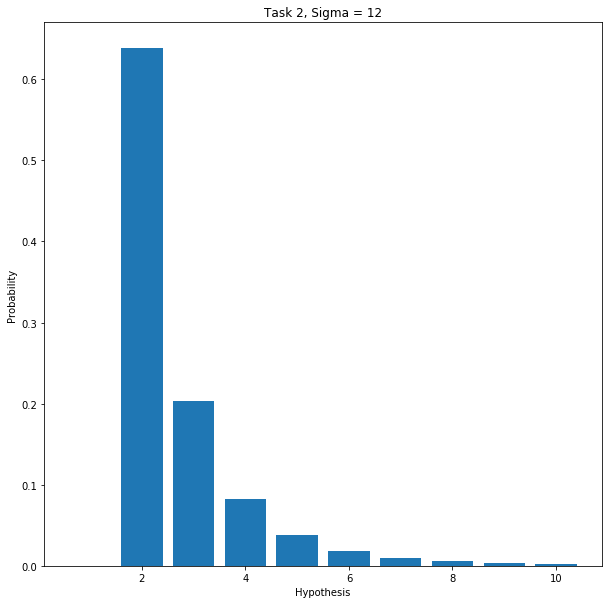

In [52]:
plot_probs(xvals, final_probs, "Task 2, Sigma = 12")

In [53]:
scientific_probs = ['%.5e' % prob for prob in final_probs]
scientific_probs

['0.00000e+00',
 '6.38404e-01',
 '2.03305e-01',
 '8.19419e-02',
 '3.75769e-02',
 '1.86979e-02',
 '9.84317e-03',
 '5.39991e-03',
 '3.05715e-03',
 '1.77434e-03']

## Task 3

Using the results of Task 2, compute generalization predictions, $P(y \in concept \vert X)$, over the whole space of possible generalization points, y,  for $X = \{(1.5, 0.5)\}$ and $\sigma = 10$. (I used the notation $P(Q \vert X)$ in the lectures slides.) The input space should span the region from (-10,-10) to (+10,+10). Display your result as a contour map in 2D space where the coloring of the contour map represents the probability that an input at that point in the space will be a member of the concept. (If the probabilities span a wide dynamic range, you can always plot the logarithm of the probability in the contour map. If you choose to do this, be sure to label the graph.)

In [15]:
final_probs

[0.0,
 0.63840373714832888,
 0.20330500731293197,
 0.081941851876583788,
 0.037576897610222003,
 0.018697933119409354,
 0.0098431747516443246,
 0.0053999094116425712,
 0.0030571489720130295,
 0.0017743397972240045]

In [16]:
def contour_plot(probs):
    prob_array = np.zeros([21, 21])
    for u in range(-10, 11):
        for v in range(-10, 11):
            idx = max(abs(u), abs(v))
            if idx == 0:
                prob_array[0 + 10][0 + 10] = 0
            else:
                prob_array[u + 10][v + 10] = probs[idx - 1]
    return prob_array


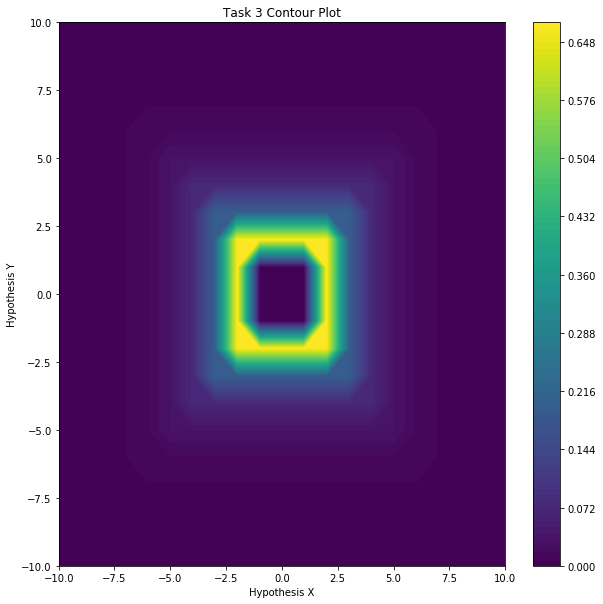

In [17]:
points = [(1.5, 0.5)]
priors = calc_priors(10)
final_probs = calc_final_probs(priors, points)
prob_array = contour_plot(final_probs)
plt.figure(figsize=(10, 10))
x = [i for i in range(-10, 11)]
y = [j for j in range(-10, 11)]
n = 100
plt.contourf(x, y, prob_array, n)
plt.ylabel("Hypothesis Y")
plt.xlabel("Hypothesis X")
plt.title("Task 3 Contour Plot")
plt.colorbar()

In [18]:
scientific_probs = ['%.5e' % prob for prob in final_probs]
scientific_probs

['0.00000e+00',
 '6.65678e-01',
 '1.98319e-01',
 '7.47771e-02',
 '3.20797e-02',
 '1.49331e-02',
 '7.35426e-03',
 '3.77431e-03',
 '1.99901e-03',
 '1.08538e-03']

In [19]:
sum(final_probs)

1.0

## Task 4

Repeat Task 3 for $X = \{(4.5, 2.5)\}$.

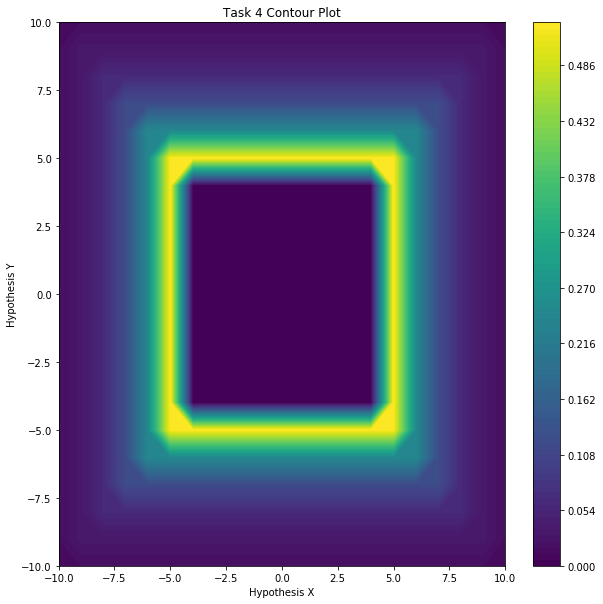

In [20]:
points = [(4.5, 2.5)]
priors = calc_priors(10)
final_probs = calc_final_probs(priors, points)
prob_array = contour_plot(final_probs)
plt.figure(figsize=(10, 10))
x = [i for i in range(-10, 11)]
y = [j for j in range(-10, 11)]
n = 100
plt.contourf(x, y, prob_array, n)
plt.ylabel("Hypothesis Y")
plt.xlabel("Hypothesis X")
plt.title("Task 4 Contour Plot")
plt.colorbar()

In [21]:
scientific_probs = ['%.5e' % prob for prob in final_probs]
scientific_probs

['0.00000e+00',
 '0.00000e+00',
 '0.00000e+00',
 '0.00000e+00',
 '5.23958e-01',
 '2.43902e-01',
 '1.20117e-01',
 '6.16457e-02',
 '3.26498e-02',
 '1.77275e-02']

## Task 5

Compute generalization predictions, $P(y\in concept \vert X)$, over the whole input space for $\sigma = 30$ and three different sets of input examples: $X = \{(2.2, -.2)\}$, $X = \{(2.2, -.2), (.5, .5)\}$, and $X = \{(2.2, -.2), (.5, .5), (1.5, 1)\}$. Describe how the posterior is changing as new examples are added, and explain why this occurs.

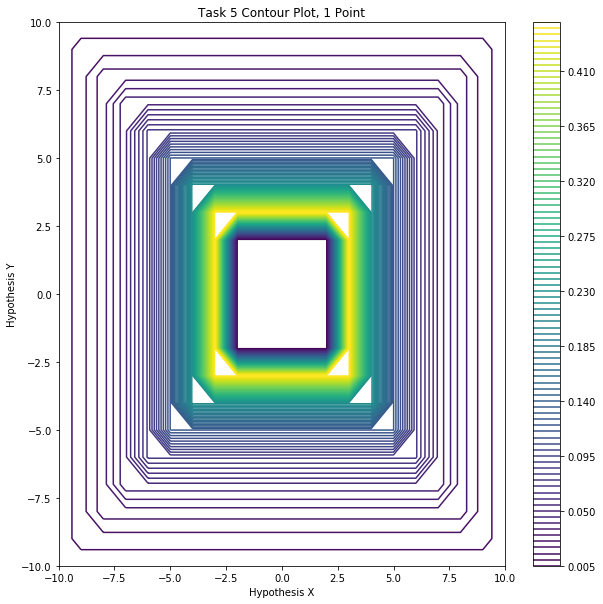

In [39]:
points = [(2.2, -.2)]
priors = calc_priors(30)
final_probs = calc_final_probs(priors, points)
prob_array = contour_plot(final_probs)
plt.figure(figsize=(10, 10))
x = [i for i in range(-10, 11)]
y = [j for j in range(-10, 11)]
n = 100
plt.contour(x, y, prob_array, n)
plt.ylabel("Hypothesis Y")
plt.xlabel("Hypothesis X")
plt.title("Task 5 Contour Plot, 1 Point")
plt.colorbar()

In [23]:
scientific_probs = ['%.5e' % prob for prob in final_probs]
scientific_probs

['0.00000e+00',
 '0.00000e+00',
 '5.93197e-01',
 '2.23668e-01',
 '9.59547e-02',
 '4.46669e-02',
 '2.19976e-02',
 '1.12895e-02',
 '5.97930e-03',
 '3.24651e-03']

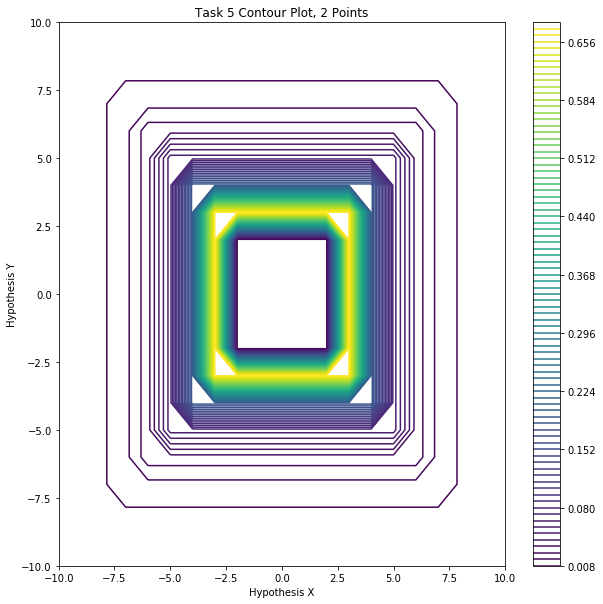

In [38]:
points = [(2.2, -.2), (.5, .5)]
priors = calc_priors(30)
final_probs = calc_final_probs(priors, points)
prob_array = contour_plot(final_probs)
plt.figure(figsize=(10, 10))
x = [i for i in range(-10, 11)]
y = [j for j in range(-10, 11)]
n = 100
plt.contour(x, y, prob_array, n)
plt.ylabel("Hypothesis Y")
plt.xlabel("Hypothesis X")
plt.title("Task 5 Contour Plot, 2 Points")
plt.colorbar()

In [25]:
scientific_probs = ['%.5e' % prob for prob in final_probs]
scientific_probs

['0.00000e+00',
 '0.00000e+00',
 '7.69082e-01',
 '1.63117e-01',
 '4.47860e-02',
 '1.44777e-02',
 '5.23835e-03',
 '2.05830e-03',
 '8.61353e-04',
 '3.78820e-04']

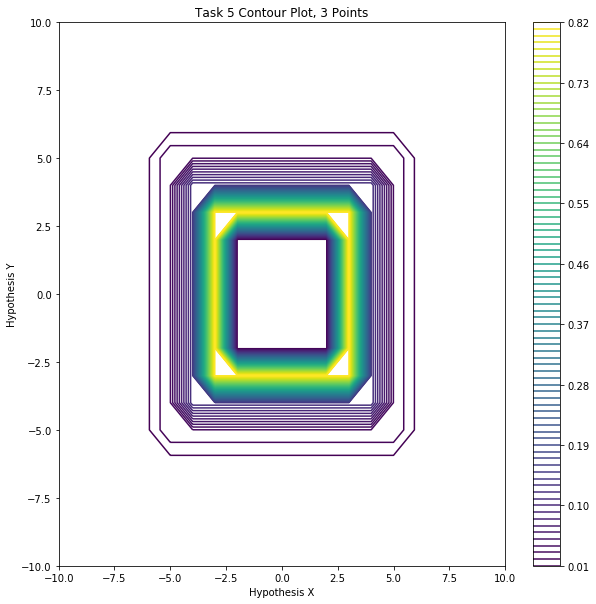

In [36]:
points = [(2.2, -.2), (.5, .5), (1.5, 1)]
priors = calc_priors(30)
final_probs = calc_final_probs(priors, points)
prob_array = contour_plot(final_probs)
plt.figure(figsize=(10, 10))
x = [i for i in range(-10, 11)]
y = [j for j in range(-10, 11)]
n = 100
plt.contour(x, y, prob_array, n)
plt.ylabel("Hypothesis Y")
plt.xlabel("Hypothesis X")
plt.title("Task 5 Contour Plot, 3 Points")
plt.colorbar()

In [27]:
import seaborn as sns

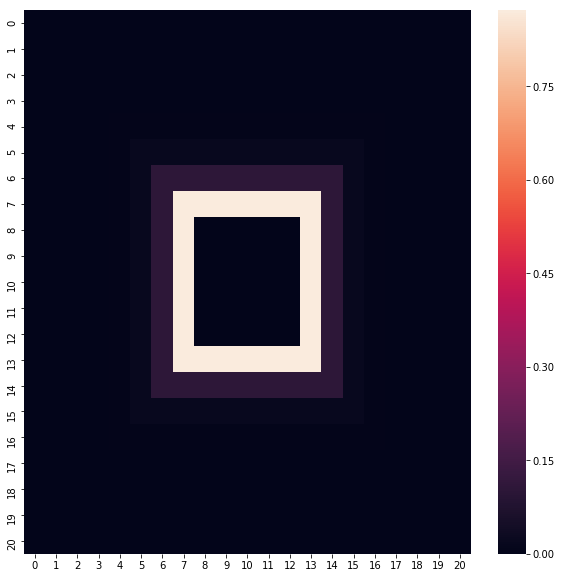

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(prob_array)


In [29]:
scientific_probs = ['%.5e' % prob for prob in final_probs]
scientific_probs

['0.00000e+00',
 '0.00000e+00',
 '8.72015e-01',
 '1.04034e-01',
 '1.82808e-02',
 '4.10384e-03',
 '1.09092e-03',
 '3.28188e-04',
 '1.08515e-04',
 '3.86569e-05']

In [30]:
scientific_probs = ['%.5e' % prob for prob in final_probs]
scientific_probs

['0.00000e+00',
 '0.00000e+00',
 '8.72015e-01',
 '1.04034e-01',
 '1.82808e-02',
 '4.10384e-03',
 '1.09092e-03',
 '3.28188e-04',
 '1.08515e-04',
 '3.86569e-05']

## Task 6 (Optional)

Do some other interesting experiment with the model.  One possibility would be to extend the model to accommodate negative as well as positive examples.  Another possibility would be to compare generalization surfaces with and without the size principle, and with an uninformative prior (here, uniform would work) compared to the expected-size prior.

In [31]:
a = [2, 5, 5]

In [32]:
np.prod(a)

50